### **Customer charn classification project**
in this notebook we are going to perform:<br>
-> reading the data set.<br>
-> visualize the features.<br>
-> Fix Class imbalance(OverSampling)<br>
-> Data pre-processing.<br>
-> Model 
-> Comparing between models according to evaluation metrics.<br> 

**1) Reading Data**

import reuired modules

In [6]:
import pandas as pd
import numpy as np


In [7]:
df=pd.read_csv("P1_Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**2) Features visualization**

a) numerical data

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'EstimatedSalary'}>]], dtype=object)

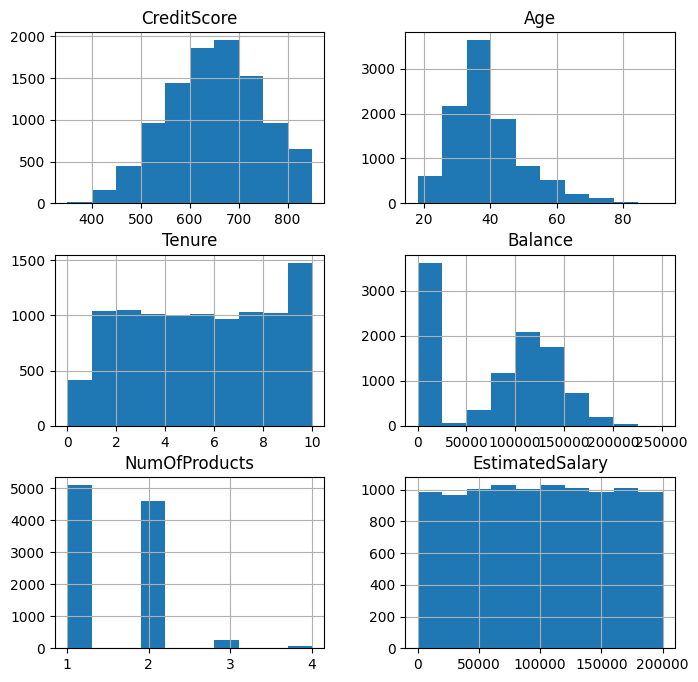

In [10]:
df.hist(column=["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"],figsize=(8,8))

b) categorical data

<Axes: ylabel='count'>

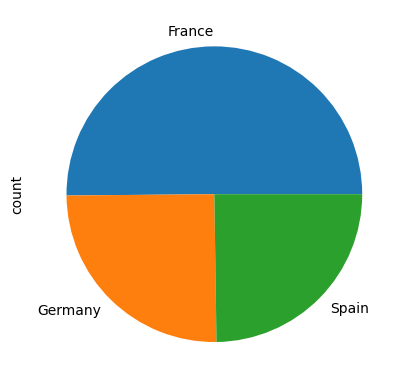

In [11]:
df["Geography"].value_counts().plot.pie()


<Axes: ylabel='count'>

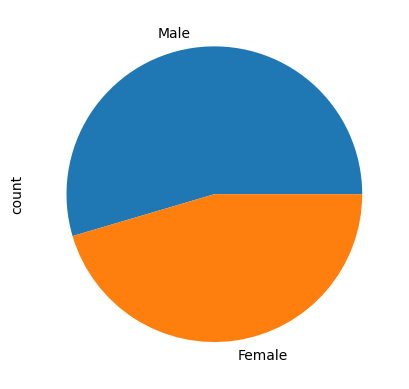

In [12]:
df["Gender"].value_counts().plot.pie()

c) check for class imbalance (distribution of target variable) 

array([[<Axes: title={'center': 'Exited'}>]], dtype=object)

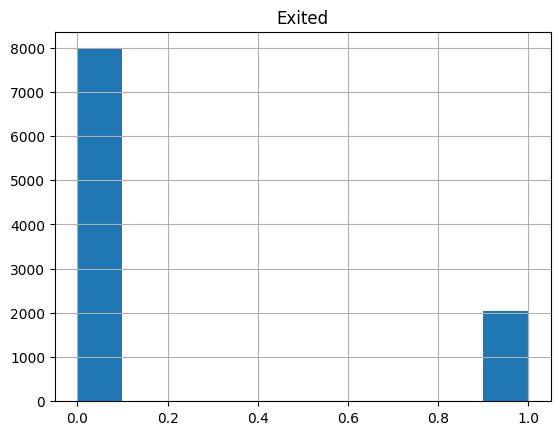

In [13]:
df.hist(column="Exited")

#### Clearly the data is Imbalanced so we are going to apply oversampling to fix it

**3.OverSampling**

In [14]:
from sklearn.utils import resample

array([[<Axes: title={'center': 'Exited'}>]], dtype=object)

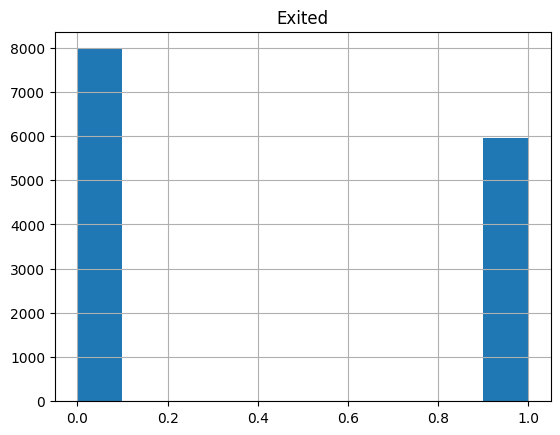

In [15]:
minority_class= df[df["Exited"]==1]
majority_class= df[df["Exited"]==0]
minority_resampled=resample(minority_class,replace=True,n_samples=len(majority_class)-2000)
df_balanced=pd.concat([majority_class,minority_resampled])
df_balanced.hist(column="Exited")

now more balanced

**4.Data Pre-proccessing**

#### RowNumber and Surname are not contributong in the prediction so we can drop them safely

In [16]:
df_balanced.drop(columns=["Surname","RowNumber"],inplace=True)
df_balanced

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1500,15590146,630,France,Male,50,1,81947.76,1,0,1,63606.22,1
2372,15578297,737,Germany,Female,43,1,125537.38,1,1,0,138510.01,1
3358,15750638,705,Germany,Female,33,5,116765.70,1,0,0,190659.17,1
2434,15613189,774,France,Female,52,2,56580.93,1,1,0,113266.28,1


#### Encoding of categorical data coumns (Gender , Geography)

In [17]:
from sklearn.preprocessing import OneHotEncoder


In [18]:
encoder=OneHotEncoder(sparse_output=False)
encoded_Gender_array=encoder.fit_transform(df_balanced[["Gender"]])
encoded_Gender_array
encoded_Gender_df=pd.DataFrame(encoded_Gender_array,columns=encoder.get_feature_names_out(["Gender"]))
print(encoded_Gender_df["Gender_Female"].unique())
print(len(encoded_Gender_df))
# Reset indices of both DataFrames
df_balanced.reset_index(drop=True, inplace=True)
encoded_Gender_df.reset_index(drop=True, inplace=True)
df_balanced=pd.concat([df_balanced,encoded_Gender_df],axis=1)




[1. 0.]
13926


In [19]:
df_balanced["Gender_Male"].unique()

array([0., 1.])

In [20]:
encoded_Geography_array=encoder.fit_transform(df_balanced[["Geography"]])
encoded_Geography_df=pd.DataFrame(encoded_Geography_array,columns=encoder.get_feature_names_out(["Geography"]))
df_balanced=pd.concat([df_balanced,encoded_Geography_df],axis=1)
encoded_Geography_df


,Geography_France,Geography_Germany,Geography_Spain
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
13921,1.0,0.0,0.0
13922,0.0,1.0,0.0
13923,0.0,1.0,0.0
13924,1.0,0.0,0.0


""" encoded_Gender=pd.get_dummies(df_balanced["Gender"])
def TF(x):
    if x==True:
        return 1
    else:
        return 0 
encoded_Gender=encoded_Gender["Female"].apply(TF)
#encoded_Gender=encoded_Gender["Male"].apply(TF)
encoded_Gender """

In [21]:
df_balanced.drop(columns=["Gender","Geography"],inplace=True)


In [22]:
df_balanced

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1.0,0.0,0.0,0.0,1.0
1,15701354,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,1.0,0.0,0.0
2,15737888,850,43,2,125510.82,1,1,1,79084.10,0,1.0,0.0,0.0,0.0,1.0
3,15592531,822,50,7,0.00,2,1,1,10062.80,0,0.0,1.0,1.0,0.0,0.0
4,15792365,501,44,4,142051.07,2,0,1,74940.50,0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13921,15590146,630,50,1,81947.76,1,0,1,63606.22,1,0.0,1.0,1.0,0.0,0.0
13922,15578297,737,43,1,125537.38,1,1,0,138510.01,1,1.0,0.0,0.0,1.0,0.0
13923,15750638,705,33,5,116765.70,1,0,0,190659.17,1,1.0,0.0,0.0,1.0,0.0
13924,15613189,774,52,2,56580.93,1,1,0,113266.28,1,1.0,0.0,1.0,0.0,0.0


Data Splitting

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x=df_balanced.drop(columns="Exited")
y=df_balanced["Exited"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

Feature Scaling Using StandardScaler (mean=0, variance=1) 

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-0.34525566,  0.71947997, -0.72050868, ..., -0.94088244,
        -0.64389687,  1.79257166],
       [-0.07252919, -0.54594323,  0.50828292, ..., -0.94088244,
         1.55304374, -0.55785775],
       [-0.76409006, -0.00507686,  1.26446236, ...,  1.06283203,
        -0.64389687, -0.55785775],
       ...,
       [ 1.1870812 , -0.43368794, -0.62598625, ..., -0.94088244,
        -0.64389687,  1.79257166],
       [ 0.02863525,  0.30107391, -0.81503111, ...,  1.06283203,
        -0.64389687, -0.55785775],
       [ 0.82577168, -0.28061256, -0.05885167, ...,  1.06283203,
        -0.64389687, -0.55785775]])

**5.Models Hyper-parameter Tunning using GridSearch**

In [27]:
import sklearn
from sklearn.model_selection import GridSearchCV

a) KNN

In [28]:
import sklearn.neighbors

# Define the parameter grid for the number of neighbors (K)
knn_param_grid = {
    'n_neighbors': [2, 3, 5, 7, 9, 11]
}

# Initialize the K-Nearest Neighbors classifier with Euclidean distance metric
knn_model = sklearn.neighbors.KNeighborsClassifier(metric="euclidean")

# Perform grid search with cross-validation (cv=7) to find the best number of neighbors
knn_grid_search = GridSearchCV(knn_model, cv=7, param_grid=knn_param_grid, scoring="f1")

# Fit the model on the training data
knn_grid_search.fit(X=x_train, y=y_train)

# Get the best model from the grid search
knn_best_model = knn_grid_search.best_estimator_

# Print the best parameters and the best score from the grid search
print(f"best parameters : {knn_grid_search.best_params_}")
print(f"best f1-score : {knn_grid_search.best_score_}")

best parameters : {'n_neighbors': 2}
best f1-score : 0.8054906528781766


b) Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# Initialize the Gaussian Naive Bayes model 
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X=x_train, y=y_train)
best_naive_bayes_model = naive_bayes_model  #there is no hyperparameter to tune


c) SVM

In [59]:
from sklearn.svm import SVC

# Define the parameter grid for the Support Vector Machine
SVM_param_grid = {
    'C': [1, 10, 100]
    
}
SVM_model = SVC(probability=True)
SVM_grid_search = GridSearchCV(SVM_model, cv=5, param_grid=SVM_param_grid, scoring="f1")
SVM_grid_search.fit(X=x_train, y=y_train)
SVM_best_model = SVM_grid_search.best_estimator_
print(f"best parameters : {SVM_grid_search.best_params_}")
print(f"best f1-score : {SVM_grid_search.best_score_}")



best parameters : {'C': 100}
best f1-score : 0.8357731510294444


d) Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
DT_param_grid = {
    'max_depth': [13, 14, 15, 16, 17, 18, 19, 20],
    'min_samples_split': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}
DT_model = DecisionTreeClassifier()
DT_grid_search = GridSearchCV(DT_model, cv=5, param_grid=DT_param_grid, scoring="f1")
DT_grid_search.fit(X=x_train, y=y_train)
DT_best_model = DT_grid_search.best_estimator_
print(f"best parameters : {DT_grid_search.best_params_}")
print(f"best f1-score : {DT_grid_search.best_score_}")

best parameters : {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 4}
best f1-score : 0.8610737259426975


**6.Models Evaluation Metrics**

In [42]:
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score, accuracy_score,roc_auc_score,roc_curve,ro
from matplotlib import pyplot as plt
import seaborn as sns

a)KNN

KNN - Precision: 0.8542222222222222
KNN - Recall: 0.810970464135021
KNN - F1 Score: 0.832034632034632
KNN - ROC AUC Score: 0.8542672433104836
KNN Confusion Matrix:


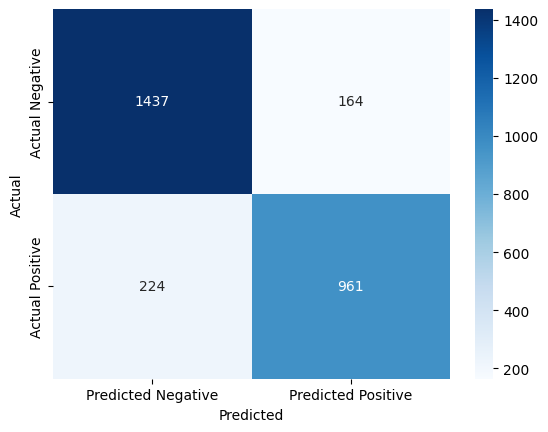


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1601
           1       0.85      0.81      0.83      1185

    accuracy                           0.86      2786
   macro avg       0.86      0.85      0.86      2786
weighted avg       0.86      0.86      0.86      2786



In [45]:
# Predicting the test set
y_pred_knn = knn_best_model.predict(x_test)
y_pred_knn_prob = knn_best_model.predict_proba(x_test)[:, 1]
# Evaluate the model
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)

# Display the evaluation metrics
print(f"KNN - Precision: {precision_knn}")
print(f"KNN - Recall: {recall_knn}")
print(f"KNN - F1 Score: {f1_knn}")
print(f"KNN - ROC AUC Score: {roc_auc_knn}")

# Confusion Matrix and Classification Report
print("KNN Confusion Matrix:")
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN ROC-curve plot

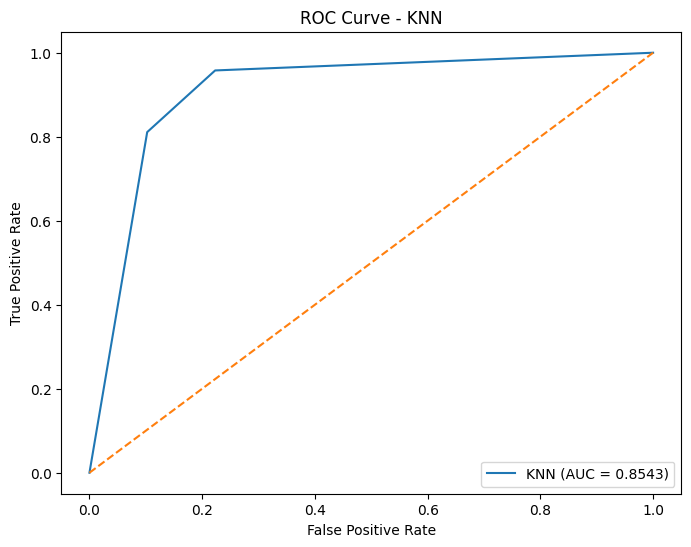

In [47]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc_knn:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.title('ROC Curve - KNN')
plt.show()

KNN area under curve of ROC is 0.85.

b) Naive Bayes

Naive Bayes - Precision: 0.6908212560386473
Naive Bayes - Recall: 0.6033755274261603
Naive Bayes - F1 Score: 0.6441441441441441
Naive Bayes - ROC AUC Score: 0.7017502246749789
Naive Bayes Confusion Matrix:


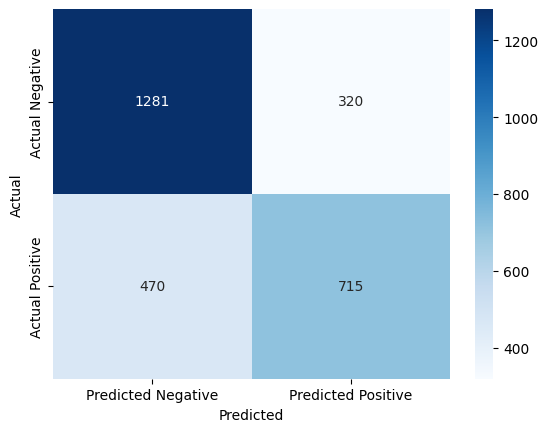


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76      1601
           1       0.69      0.60      0.64      1185

    accuracy                           0.72      2786
   macro avg       0.71      0.70      0.70      2786
weighted avg       0.71      0.72      0.71      2786



In [48]:
# Predicting the validation set
y_pred_nb = best_naive_bayes_model.predict(x_test)
y_pred_nb_proba = best_naive_bayes_model.predict_proba(x_test)[:, 1]  # Probability of the positive class

# Evaluate the model
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_pred_nb)

# Display the evaluation metrics
print(f"Naive Bayes - Precision: {precision_nb}")
print(f"Naive Bayes - Recall: {recall_nb}")
print(f"Naive Bayes - F1 Score: {f1_nb}")
print(f"Naive Bayes - ROC AUC Score: {roc_auc_nb}")

# Confusion Matrix and Classification Report
print("Naive Bayes Confusion Matrix:")
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

ROC curve plot of Naive Bayes

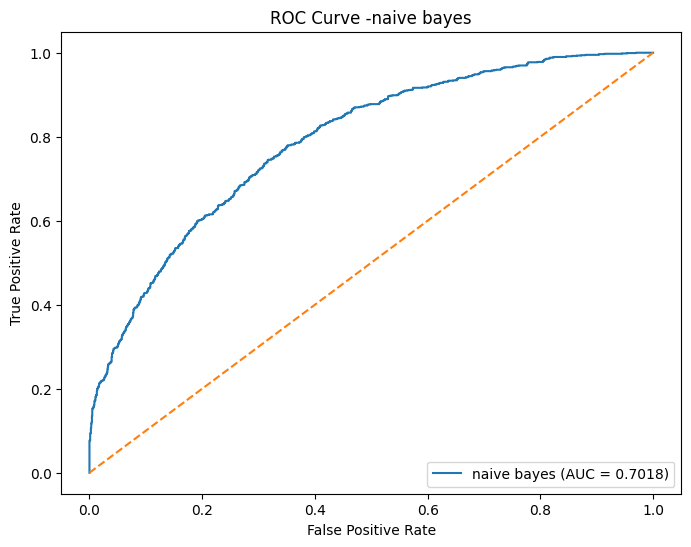

In [51]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nb_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'naive bayes (AUC = {roc_auc_nb:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.title('ROC Curve -naive bayes')
plt.show()

Naive Bayes area under curve of ROC is 0.7

c) SVM


SVM - Precision: 0.8204924543288324
SVM - Recall: 0.8717299578059071
SVM - F1 Score: 0.8453355155482815
SVM - ROC AUC Score: 0.8652840919572946
SVM Confusion Matrix:


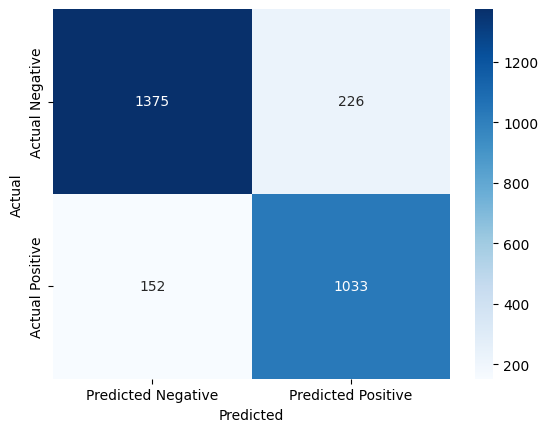


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1601
           1       0.82      0.87      0.85      1185

    accuracy                           0.86      2786
   macro avg       0.86      0.87      0.86      2786
weighted avg       0.87      0.86      0.86      2786



In [60]:
# Predicting the validation set
y_pred_svm = SVM_best_model.predict(x_test)
y_pred_svm_proba = SVM_best_model.predict_proba(x_test)[:, 1]  # Probability of the positive class

# Evaluate the model
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)

# Display the evaluation metrics
print(f"SVM - Precision: {precision_svm}")
print(f"SVM - Recall: {recall_svm}")
print(f"SVM - F1 Score: {f1_svm}")
print(f"SVM - ROC AUC Score: {roc_auc_svm}")

# Confusion Matrix and Classification Report
print("SVM Confusion Matrix:")
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

ROC curve of SVM plot

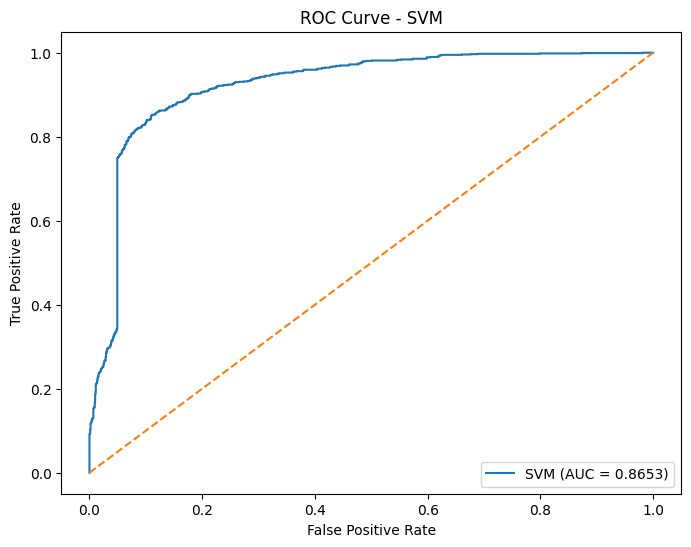

In [66]:
# Plot ROC curve for SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC Curve - SVM')
plt.show()

Area under curve of ROC is 0.865

d) Decision tree

Decision Tree - Precision: 0.8339680121858339
Decision Tree - Recall: 0.9240506329113924
Decision Tree - F1 Score: 0.8767013610888711
Decision Tree - ROC AUC Score: 0.8939428679859898
Decision Tree Confusion Matrix:


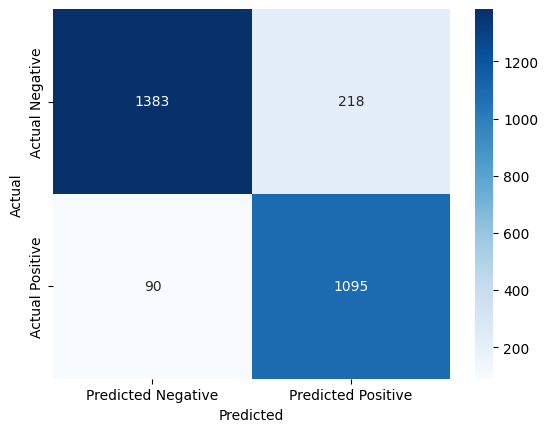


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1601
           1       0.83      0.92      0.88      1185

    accuracy                           0.89      2786
   macro avg       0.89      0.89      0.89      2786
weighted avg       0.89      0.89      0.89      2786



In [72]:
# Predicting the validation set
y_pred_dt = DT_best_model.predict(x_test)
y_pred_dt_proba = DT_best_model.predict_proba(x_test)[:, 1]  # Probability of the positive class

# Evaluate the model
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)

# Display the evaluation metrics
print(f"Decision Tree - Precision: {precision_dt}")
print(f"Decision Tree - Recall: {recall_dt}")
print(f"Decision Tree - F1 Score: {f1_dt}")
print(f"Decision Tree - ROC AUC Score: {roc_auc_dt}")

# Confusion Matrix and Classification Report
print("Decision Tree Confusion Matrix:")
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision tree ROC plot

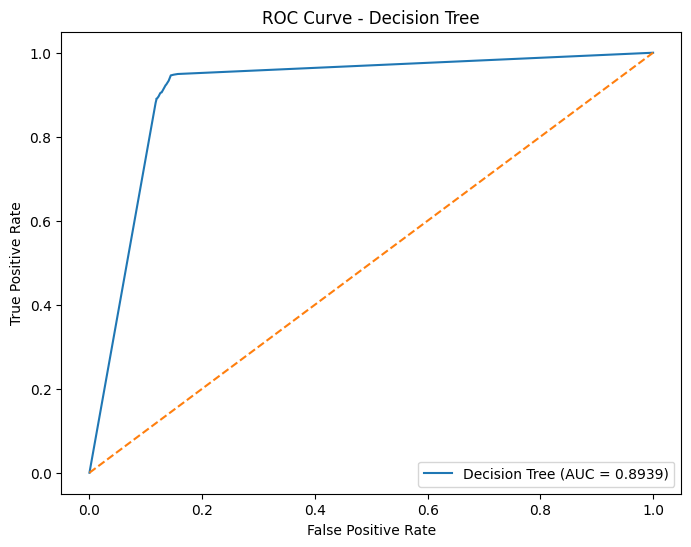

In [73]:
# Plot ROC curve for Decision Tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC Curve - Decision Tree')
plt.show()

Area under curve of ROC is 0.893

#### **Comparison between models**

1.precision

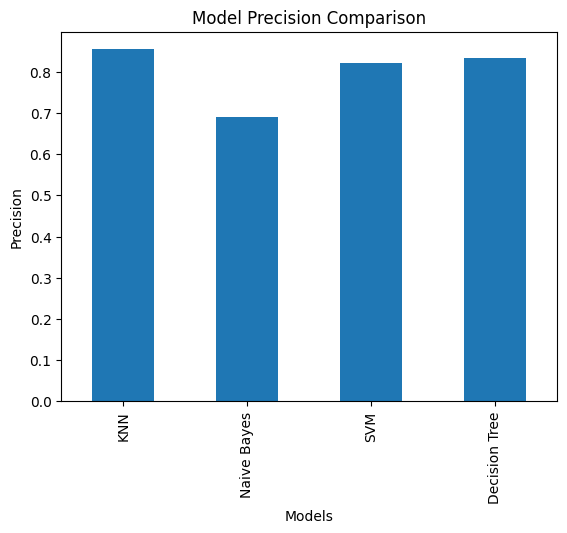

Model with the highest precision: KNN with a precision of 0.8542222222222222


In [82]:
models=["KNN","Naive Bayes","SVM","Decision Tree"]
precision=[precision_knn,precision_nb,precision_svm,precision_dt]
precision_df = pd.DataFrame({'Models': models, 'Precision': precision})
precision_df.plot(x='Models', y='Precision', kind='bar', legend=False)
plt.ylabel('Precision')
plt.title('Model Precision Comparison')
plt.show()
print(f"Model with the highest precision: {precision_df['Models'][precision_df['Precision'].idxmax()]} with a precision of {precision_df['Precision'].max()}")

2.recall

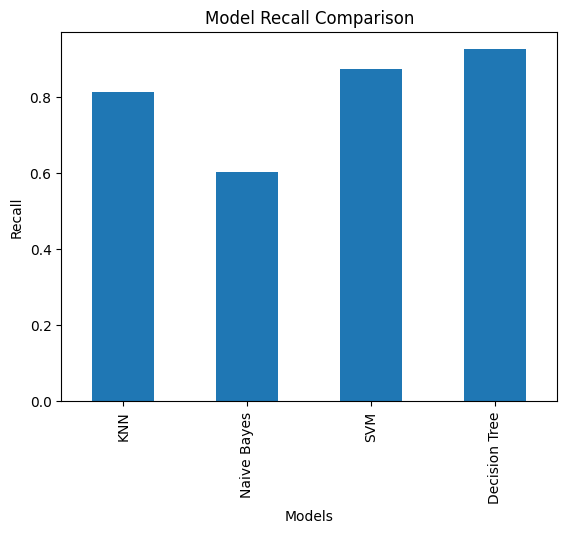

Model with the highest recall: Decision Tree with a recall of 0.9240506329113924


In [83]:
models=["KNN","Naive Bayes","SVM","Decision Tree"]
recall=[recall_knn,recall_nb,recall_svm,recall_dt]
recall_df = pd.DataFrame({'Models': models, 'Recall': recall})
recall_df.plot(x='Models', y='Recall', kind='bar', legend=False)
plt.ylabel('Recall')
plt.title('Model Recall Comparison')
plt.show()
print(f"Model with the highest recall: {recall_df['Models'][recall_df['Recall'].idxmax()]} with a recall of {recall_df['Recall'].max()}")


3.f1-score


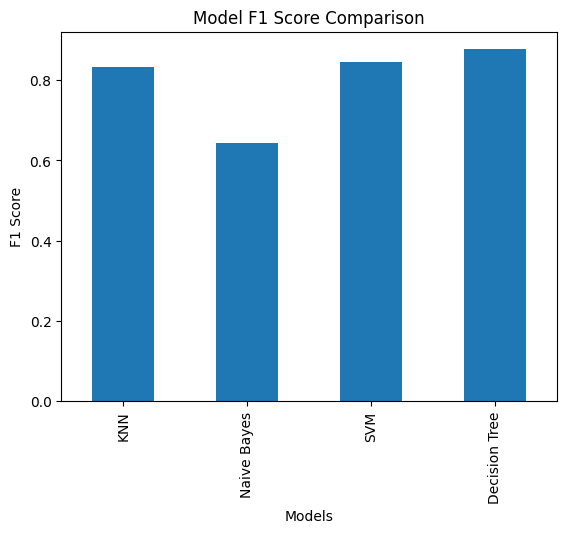

Model with the highest F1 Score: Decision Tree with a F1 Score of 0.8767013610888711


In [84]:
models=["KNN","Naive Bayes","SVM","Decision Tree"]
f1=[f1_knn,f1_nb,f1_svm,f1_dt]
f1_df = pd.DataFrame({'Models': models, 'F1': f1})
f1_df.plot(x='Models', y='F1', kind='bar', legend=False)
plt.ylabel('F1 Score')
plt.title('Model F1 Score Comparison')
plt.show()
print(f"Model with the highest F1 Score: {f1_df['Models'][f1_df['F1'].idxmax()]} with a F1 Score of {f1_df['F1'].max()}")

4.ROC-AUC


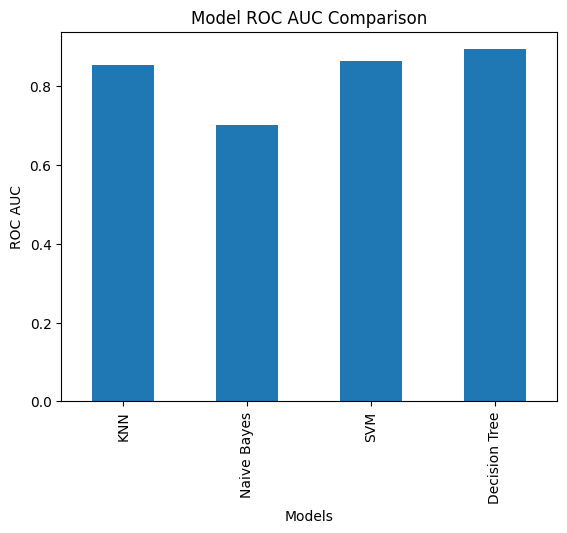

Model with the highest ROC AUC: Decision Tree with a ROC AUC of 0.8939428679859898


In [85]:
models=["KNN","Naive Bayes","SVM","Decision Tree"]
roc_auc=[roc_auc_knn,roc_auc_nb,roc_auc_svm,roc_auc_dt]
roc_auc_df = pd.DataFrame({'Models': models, 'ROC AUC': roc_auc})
roc_auc_df.plot(x='Models', y='ROC AUC', kind='bar', legend=False)
plt.ylabel('ROC AUC')
plt.title('Model ROC AUC Comparison')
plt.show()
print(f"Model with the highest ROC AUC: {roc_auc_df['Models'][roc_auc_df['ROC AUC'].idxmax()]} with a ROC AUC of {roc_auc_df['ROC AUC'].max()}")


#### BEST MODEL OVERALL ACCORDING TO EVALUATION METRICS IS --**DECISION TREE**--